# Step0: Import

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import auc, precision_recall_curve, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pickle

# - Reading the dataset




In [21]:
# drive.mount('/content/gdrive')
dataset = pd.read_csv('diabetes.csv')
dataset

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


# > Preprocessing part

## Remove void Data

### Handle white spaces in dataset



####  dataset Columns:

In [24]:
del dataset["Unnamed: 0"]
dataset.columns

Index(['Diabetes_binary', 'HighBP', 'High Cholesterol', 'Cholesterol Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical Activity',
       'Fruits', 'Veggies', 'Heavy Alcohol Consumption', 'Any Health Care',
       'No Doctor because of Cost', 'General Health', 'Mental Health',
       'Physical Health', 'Difficulty Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [18]:
# del dataset["Unnamed:_0"]

<div>
  
#### Replace white spaces in columns name with '_'
  
</div>

In [25]:
dataset.columns = dataset.columns.str.replace(' ', '_')
dataset.columns

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<div>

  #### Replace white spaces in data with '_'

</div>

In [27]:
for column_name in dataset.columns:
  if type(dataset[column_name][0]) == str:
    dataset[column_name] = dataset[column_name].str.replace(' ', '_')
  
dataset

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very_Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


### Handle missing data

In [28]:
dataset.isna().sum()

Diabetes_binary              0
HighBP                       0
High_Cholesterol             0
Cholesterol_Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical_Activity            1
Fruits                       2
Veggies                      1
Heavy_Alcohol_Consumption    1
Any_Health_Care              2
No_Doctor_because_of_Cost    2
General_Health               1
Mental_Health                1
Physical_Health              1
Difficulty_Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

<div>

   #### Delete record with too many missing data

</div>

In [ ]:
dataset["HeartDiseaseorAttack"].describe()

count    70691.000000
mean         0.147812
std          0.354916
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HeartDiseaseorAttack, dtype: float64

In [29]:
dataset.loc[dataset['HeartDiseaseorAttack'].isna()]

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
dataset.iloc[11691]

Diabetes_binary               0.0
HighBP                        0.0
High_Cholesterol              0.0
Cholesterol_Check             1.0
BMI                          27.0
Smoker                        0.0
Stroke                        0.0
HeartDiseaseorAttack          NaN
Physical_Activity             NaN
Fruits                        NaN
Veggies                       NaN
Heavy_Alcohol_Consumption     NaN
Any_Health_Care               NaN
No_Doctor_because_of_Cost     NaN
General_Health                NaN
Mental_Health                 NaN
Physical_Health               NaN
Difficulty_Walking            NaN
Sex                           NaN
Age                           NaN
Education                     NaN
Income                        NaN
Name: 11691, dtype: object

In [31]:
dataset = dataset.drop(11691)

<div>

  Find columns that have a null value

</div>

In [33]:
columns = dataset.isna().sum()
columns = dict(columns)
columns_have_null_value = []
for column_name, num_null_value in columns.items():
  if num_null_value > 0:
    columns_have_null_value.append(column_name)

print(f"columns containing null value over total number of columns: {len(columns_have_null_value)} / {len(columns)}")

columns containing null value over total number of columns: 5 / 22


<div>

  #### Replace "Unknown" with column mode 
  <!-- (in Income column) -->

</div>

In [34]:
dataset["Income"].replace('Unknown', dataset["Income"].mode()[0], inplace=True)

<div>

  #### Replace missing data with column mode

</div>


In [35]:
for column_name in columns_have_null_value:
  dataset[column_name].fillna(dataset[column_name].mode()[0], inplace=True)

dataset.isna().sum()

Diabetes_binary              0
HighBP                       0
High_Cholesterol             0
Cholesterol_Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical_Activity            0
Fruits                       0
Veggies                      0
Heavy_Alcohol_Consumption    0
Any_Health_Care              0
No_Doctor_because_of_Cost    0
General_Health               0
Mental_Health                0
Physical_Health              0
Difficulty_Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

## Normalization

<div>

  ### Min-Max normalization on numeric data

</div>


In [38]:
dataset["Age"].describe()


count    70691.000000
mean         8.584105
std          2.852141
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         13.000000
Name: Age, dtype: float64

In [39]:
dataset["Physical_Health"].describe()

count    70691.000000
mean         5.810499
std         10.062308
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max         30.000000
Name: Physical_Health, dtype: float64

In [40]:
dataset["Mental_Health"].describe()

count    70691.000000
mean         3.752062
std          8.155682
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: Mental_Health, dtype: float64

In [41]:
min_max_scaler = MinMaxScaler()
dataset[["Age", "Physical_Health", "Mental_Health"]] = min_max_scaler.fit_transform(dataset[["Age", "Physical_Health", "Mental_Health"]])

In [42]:
dataset["Age"].describe()

count    70691.000000
mean         0.632009
std          0.237678
min          0.000000
25%          0.500000
50%          0.666667
75%          0.833333
max          1.000000
Name: Age, dtype: float64

In [43]:
dataset["Physical_Health"].describe()

count    70691.000000
mean         0.193683
std          0.335410
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          1.000000
Name: Physical_Health, dtype: float64

In [44]:
dataset["Mental_Health"].describe()

count    70691.000000
mean         0.125069
std          0.271856
min          0.000000
25%          0.000000
50%          0.000000
75%          0.066667
max          1.000000
Name: Mental_Health, dtype: float64

<div>

  ### categorize BMI values

</div>

<!-- for BMI range check this[BMI](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/#:~:text=BMI%20ranges&text=below%2018.5%20%E2%80%93%20you're%20in,re%20in%20the%20obese%20range) -->

In [45]:
dataset["BMI"] = pd.cut(dataset["BMI"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["underweight", "healthy", "overweight", "obese"])
dataset["BMI"].describe

<bound method NDFrame.describe of 0         overweight
1         overweight
2         overweight
3         overweight
4         overweight
            ...     
70687          obese
70688     overweight
70689     overweight
70690    underweight
70691     overweight
Name: BMI, Length: 70691, dtype: category
Categories (4, object): ['underweight' < 'healthy' < 'overweight' < 'obese']>

In [46]:
dataset

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,overweight,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.000000,0.0,male,0.250000,Cat6,Cat8
1,0.0,1.0,1.0,1.0,overweight,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.000000,0.0,male,0.916667,Cat6,Cat8
2,0.0,0.0,0.0,1.0,overweight,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,0.333333,0.0,male,1.000000,Cat6,Cat8
3,0.0,1.0,1.0,1.0,overweight,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,0.100000,0.0,male,0.833333,Cat6,Cat8
4,0.0,0.0,0.0,1.0,overweight,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,0.0,female,0.583333,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,obese,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,0.0,female,0.416667,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,overweight,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,1.0,male,0.750000,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,overweight,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very_Low,0.500000,0.000000,1.0,female,1.000000,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,underweight,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,1.0,female,0.833333,Cat2,Cat4


## One-hot-encoding for categorized features

In [47]:
categorical_columns = ["BMI", "General_Health", "Sex", "Education", "Income"]
for column in categorical_columns:
  one_hot_encode = pd.get_dummies(dataset[column], prefix=column)
  dataset = dataset.join(one_hot_encode)
  dataset.drop(column, axis=1, inplace=True)

dataset

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
70688,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


## Split labels from features

In [48]:
labels = dataset["Diabetes_binary"]
dataset.drop("Diabetes_binary", axis=1, inplace=True)
dataset

,HighBP,High_Cholesterol,Cholesterol_Check,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,Veggies,Heavy_Alcohol_Consumption,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
70688,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
70689,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
70690,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


# > XGBoost Classifier Model

## Extract train and test datasets

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset, labels, test_size=0.2, random_state=1)
print(f"Train size : {X_train.shape}")
print(f"Test size : {X_test.shape}")

Train size : (56552, 41)
Test size : (14139, 41)


## Build the XGBoost model

In [50]:
XGB_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=200,
    subsample=0.5,
    colsample_bytree=1,
    random_seed=123,
    random_state=123,
    eval_metric='auc',
    verbosity=1,
    early_stopping_rounds=10
)
XGB_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': 10,
 'eval_metric': 'auc',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_seed': 123,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.5,
 'verbosity': 1}

<div>

  #### Train the XGBoost model

</div>

In [51]:
XGB_model.fit(X_train, Y_train)

XGBClassifier(early_stopping_rounds=10, eval_metric='auc', max_depth=4,
              n_estimators=200, random_seed=123, random_state=123,
              subsample=0.5)

<div>

  #### Prediction on train and test set with XGBoost model

</div>

In [52]:
Y_train_predicted = XGB_model.predict(X_train)
accuracy_train = accuracy_score(Y_train_predicted, Y_train)
print(f'Accuracy in train set: {accuracy_train}')

Y_test_predicted = XGB_model.predict(X_test)
accuracy_test = accuracy_score(Y_test_predicted, Y_test)
print(f'Accuracy in test set: {accuracy_test}')

Accuracy in train set: 0.7590889800537558
Accuracy in test set: 0.7521041092014994


<div>

  #### Confusion matrix:

</div>

In [56]:
def plot_confusion_matrix(Y_test, Y_test_predicted):
  cf_matrix = confusion_matrix(Y_test, Y_test_predicted)
  plt.figure(figsize=(10, 10))
  plt.imshow(cf_matrix)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Values")
  plt.ylabel("Actual Values")
  class_names = ["Positive", "Negative"]
  ticks = np.arange(len(class_names))
  plt.xticks(ticks, class_names)
  plt.yticks(ticks, class_names)
  TP, FN = cf_matrix[1][1], cf_matrix[1][0]
  FP, TN = cf_matrix[0][1], cf_matrix[0][0]
  tags = [[{"TN": TN}, {"FP": FP}], [{"FN": FN}, {"TP": TP}]]
  print(tags)

  for row_index in range(2):
    for col_index in range(2):
      plt.text(col_index, row_index, tags[row_index][col_index])

[[{'TN': 5059}, {'FP': 2081}], [{'FN': 1424}, {'TP': 5575}]]


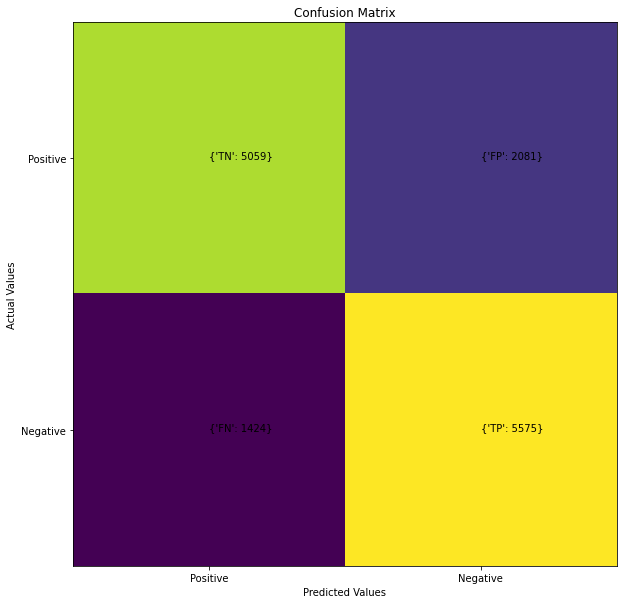

In [57]:
plot_confusion_matrix(Y_test, Y_test_predicted)

<div>

 #### Precision-Recall Curve

</div>

In [58]:
def get_precision_recall(Y_test, Y_test_predicted):
  precision, recall, _ = precision_recall_curve(Y_test, Y_test_predicted)
  return precision, recall

In [59]:
precision, recall = get_precision_recall(Y_test, Y_test_predicted)
print(f'precision: {precision}, recall: {recall}')

precision: [0.49501379 0.72818704 1.        ], recall: [1.         0.79654236 0.        ]


In [60]:
def plot_precision_recall_curve(precision, recall):
  auc_XGBoost = auc(recall, precision)
  plt.plot(recall, precision, label=f'AUC XGBoost = {auc_XGBoost}')
  plt.title('Precision-Recall Curve')
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.legend()  

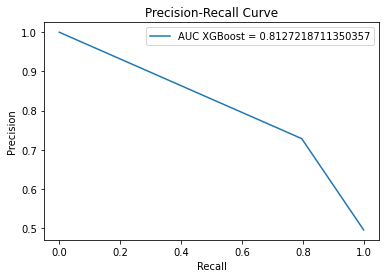

In [61]:
plot_precision_recall_curve(precision, recall)

# > Adjusting Hyperparameters

In [62]:
XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [63]:
def my_roc_auc_score(model, X, Y):
  return roc_auc_score(Y, model.predict_proba(X)[:, 1])

<div>

  #### GridSearchCV models

</div>

In [64]:
parameters = {
    'learning_rate': [0.02, 0.05, 0.1, 0.3],
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 1]
}

In [65]:
model = XGBClassifier(
    objective = 'binary:logistic',
    seed = 123 ,
    subsample= 0.5,
    eval_metric= 'auc'
    ) 

clf = GridSearchCV(
    model,
    parameters,
    cv=3,
    scoring=my_roc_auc_score
)

In [66]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(eval_metric='auc', seed=123,
                                     subsample=0.5),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x7fd39339e5f0>)

<div>

  #### Save the result into drive:

</div>

In [93]:
base_path = "/content/gdrive/MyDrive/Data Mining/Final Project/"
base_path = " "
file_to_store = open(base_path + "clf.pickle", "wb")
pickle.dump(clf, file_to_store)
file_to_store.close()

In [86]:
from google.colab import drive
# drive.mount('/content/drive')
drive.flush_and_unmount()

<div>

 #### Load the data
</div>

In [103]:
# base_path = "/content/gdrive/MyDrive/Data Mining/Final Project/"
# file_to_read = open(base_path + "clf.pickle", "rb")
# file_to_read = open("clf.pickle", "rb")
# clf = pickle.load(file_to_read)
# file_to_read.close()

<div>

  #### Best model parameters

</div>

In [102]:
best_parameters = clf.best_params_
best_score = clf.best_score_
print(f'Best model score: {best_score}')
print(f'Best model params: {best_parameters}')

Best model score: 0.8271463827642974
Best model params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


<div>

  #### Best model prediction

</div>

In [104]:
best_model_Y_test_predicted = clf.predict(X_test)
accuracy = accuracy_score(Y_test, best_model_Y_test_predicted)
print(f'test set accuracy: {accuracy}')

test set accuracy: 0.7551453426692128


<div>

  #### Best model Precision-Recall curve

</div>

In [105]:
best_model_precision, best_model_recall = get_precision_recall(Y_test, best_model_Y_test_predicted)
print(f'precision: {best_model_precision}, recall: {best_model_recall}')

precision: [0.49501379 0.73242213 1.        ], recall: [1.         0.79625661 0.        ]


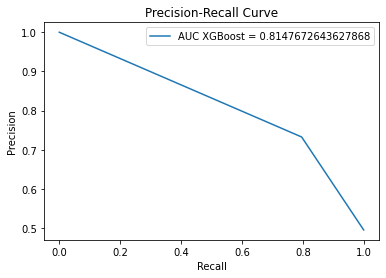

In [106]:
plot_precision_recall_curve(best_model_precision, best_model_recall)

<div>

  #### Best model Confusion matrix

</div>

[[{'TN': 5104}, {'FP': 2036}], [{'FN': 1426}, {'TP': 5573}]]


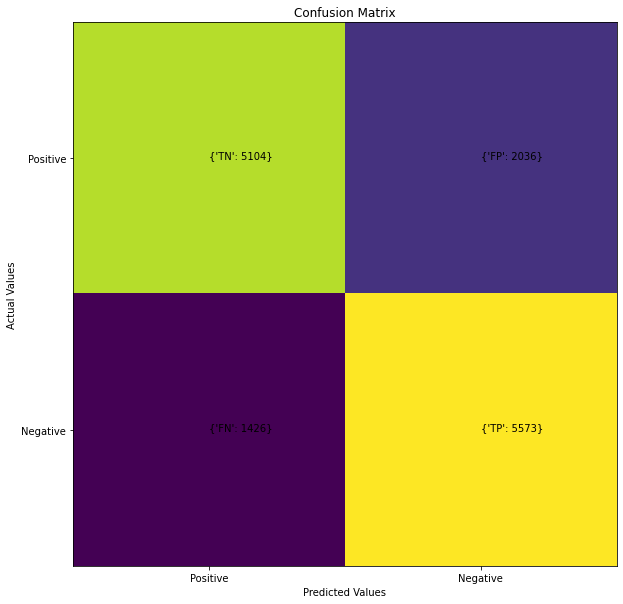

In [107]:
plot_confusion_matrix(Y_test, best_model_Y_test_predicted)

# > Visualization

In [108]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_colsample_bytree', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

<div>

  #### 72 states: (4(learning_rate)* 3(max_depth) * 3(n_estimator)* 2(colsample_butree))

</div>

In [109]:
len(clf.cv_results_["params"])

72

In [110]:
models_params = clf.cv_results_["params"]
models_mean_test_score = clf.cv_results_['mean_test_score']

<div>

  #### Relation of max_depth and learning_rate:

</div>

In [111]:
learning_rate_max_depth_dict = {0.02: {2:0, 3:0, 4:0}, 0.05: {2:0, 3:0, 4:0}, 0.1: {2:0, 3:0, 4:0}, 0.3: {2:0, 3:0, 4:0}}
fixed_params = {"n_estimators": 200, "colsample_bytree": 0.8}

for index, params in enumerate(models_params):
  if params["n_estimators"] == fixed_params["n_estimators"] and params["colsample_bytree"] == fixed_params["colsample_bytree"]:
    learning_rate, max_depth = params["learning_rate"], params["max_depth"]
    learning_rate_max_depth_dict[learning_rate][max_depth] = models_mean_test_score[index]


In [112]:
learning_rate_max_depth_dict

{0.02: {2: 0.8191405273039464, 3: 0.8231473323047287, 4: 0.8249531640468358},
 0.05: {2: 0.8248625235121888, 3: 0.8264988594689058, 4: 0.8271463827642974},
 0.1: {2: 0.8261877854839117, 3: 0.826643357884887, 4: 0.8263090215137101},
 0.3: {2: 0.8258341430727155, 3: 0.8229667336660693, 4: 0.8192607365869643}}

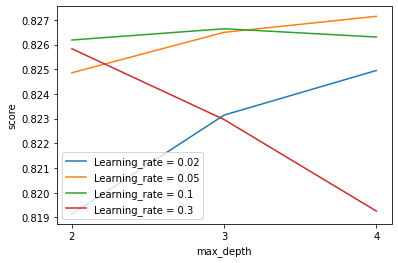

In [113]:
for learning_rate, depth_score in learning_rate_max_depth_dict.items():
  max_depth = list(learning_rate_max_depth_dict[learning_rate].keys())
  scores = list(learning_rate_max_depth_dict[learning_rate].values())
  plt.plot(max_depth, scores)

plt.legend(['Learning_rate = 0.02', 'Learning_rate = 0.05', 'Learning_rate = 0.1', 'Learning_rate = 0.3'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.xticks(max_depth)
plt.show()


Excessive increase learning rate can lead to an escape from the global optimum.

<div>

  #### Relation of n_estimators and learning_rate:

</div>

In [114]:
learning_rate_n_estimator_dict = {0.02: {100:0, 200:0, 300:0}, 0.05: {100:0, 200:0, 300:0}, 0.1: {100:0, 200:0, 300:0}, 0.3: {100:0, 200:0, 300:0}}
fixed_params = {"max_depth": 4, "colsample_bytree": 0.8}

for index, params in enumerate(models_params):
  if params["max_depth"] == fixed_params["max_depth"] and params["colsample_bytree"] == fixed_params["colsample_bytree"]:
    learning_rate, n_estimators = params["learning_rate"], params["n_estimators"]
    learning_rate_n_estimator_dict[learning_rate][n_estimators] = models_mean_test_score[index]

In [115]:
learning_rate_n_estimator_dict

{0.02: {100: 0.8201159539526145,
  200: 0.8249531640468358,
  300: 0.8264745469212328},
 0.05: {100: 0.8257826257262172,
  200: 0.8271463827642974,
  300: 0.8270386615443228},
 0.1: {100: 0.8268790256986781,
  200: 0.8263090215137101,
  300: 0.8250278477158083},
 0.3: {100: 0.8229907792968688,
  200: 0.8192607365869643,
  300: 0.8154308406169469}}

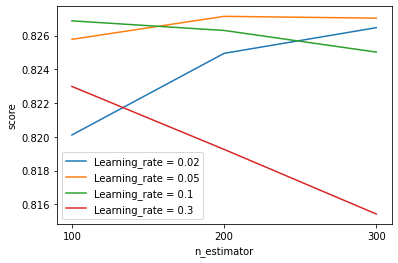

In [116]:
for learning_rate, n_estimator_score in learning_rate_n_estimator_dict.items():
  n_estimator = list(learning_rate_n_estimator_dict[learning_rate].keys())
  scores = list(learning_rate_n_estimator_dict[learning_rate].values())
  plt.plot(n_estimator, scores)

plt.legend(['Learning_rate = 0.02', 'Learning_rate = 0.05', 'Learning_rate = 0.1', 'Learning_rate = 0.3'])
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.xticks(n_estimator)
plt.show()

<div>

  #### Relation of colsample_bytree and learning_rate:

</div>

In [117]:
learning_rate_colsample_bytree_dict = {0.02: {0.8: 0, 1: 0}, 0.05: {0.8: 0, 1: 0}, 0.1: {0.8: 0, 1: 0}, 0.3: {0.8: 0, 1: 0}}
fixed_params = {"max_depth": 4, "n_estimators": 200}

for index, params in enumerate(models_params):
  if params["max_depth"] == fixed_params["max_depth"] and params["n_estimators"] == fixed_params["n_estimators"]:
    learning_rate, colsample_bytree = params["learning_rate"], params["colsample_bytree"]
    learning_rate_colsample_bytree_dict[learning_rate][colsample_bytree] = models_mean_test_score[index]

In [118]:
learning_rate_colsample_bytree_dict

{0.02: {0.8: 0.8249531640468358, 1: 0.8249113747617441},
 0.05: {0.8: 0.8271463827642974, 1: 0.8271077519350104},
 0.1: {0.8: 0.8263090215137101, 1: 0.8261972419619866},
 0.3: {0.8: 0.8192607365869643, 1: 0.8175736302785004}}

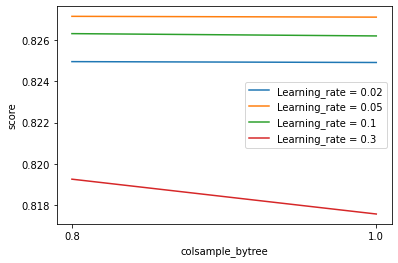

In [119]:
for learning_rate, colsample_bytree_score in learning_rate_colsample_bytree_dict.items():
  colsample_bytree = list(learning_rate_colsample_bytree_dict[learning_rate].keys())
  scores = list(learning_rate_colsample_bytree_dict[learning_rate].values())
  plt.plot(colsample_bytree, scores)

plt.legend(['Learning_rate = 0.02', 'Learning_rate = 0.05', 'Learning_rate = 0.1', 'Learning_rate = 0.3'])
plt.xlabel('colsample_bytree')
plt.ylabel('score')
plt.xticks(colsample_bytree)
plt.show()

<div>

  #### Relation of max_depth and n_estimator:

</div>

In [120]:
n_estimator_max_depth_dict = {100: {2:0, 3:0, 4:0}, 200: {2:0, 3:0, 4:0}, 300: {2:0, 3:0, 4:0}}
fixed_params = {"learning_rate": 0.05, "colsample_bytree": 0.8}

for index, params in enumerate(models_params):
  if params["learning_rate"] == fixed_params["learning_rate"] and params["colsample_bytree"] == fixed_params["colsample_bytree"]:
    n_estimators, max_depth = params["n_estimators"], params["max_depth"]
    n_estimator_max_depth_dict[n_estimators][max_depth] = models_mean_test_score[index]

In [121]:
n_estimator_max_depth_dict

{100: {2: 0.8211154903330251, 3: 0.8240215589606382, 4: 0.8257826257262172},
 200: {2: 0.8248625235121888, 3: 0.8264988594689058, 4: 0.8271463827642974},
 300: {2: 0.8258981316639294, 3: 0.827000458322396, 4: 0.8270386615443228}}

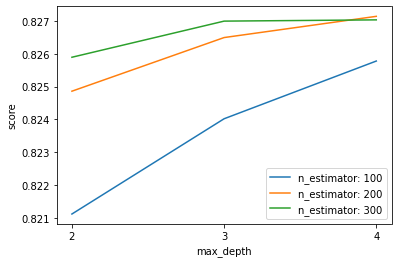

In [122]:
for n_estimator, max_depth_score in n_estimator_max_depth_dict.items():
  max_depth = list(n_estimator_max_depth_dict[n_estimator].keys())
  scores = list(n_estimator_max_depth_dict[n_estimator].values())
  plt.plot(max_depth, scores)

plt.legend(["n_estimator: 100", "n_estimator: 200", "n_estimator: 300"])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.xticks(max_depth)
plt.show()

<div>

  #### Relation of max_depth and colsample_bytree:

</div>

In [123]:
colsample_bytree_max_depth_dict = {0.8: {2:0, 3:0, 4:0}, 1: {2:0, 3:0, 4:0}}
fixed_params = {"learning_rate": 0.05, "n_estimators": 200}

for index, params in enumerate(models_params):
  if params["learning_rate"] == fixed_params["learning_rate"] and params["n_estimators"] == fixed_params["n_estimators"]:
    colsample_bytree, max_depth = params["colsample_bytree"], params["max_depth"]
    colsample_bytree_max_depth_dict[colsample_bytree][max_depth] = models_mean_test_score[index]

In [124]:
colsample_bytree_max_depth_dict

{0.8: {2: 0.8248625235121888, 3: 0.8264988594689058, 4: 0.8271463827642974},
 1: {2: 0.8249050651469645, 3: 0.8266309009229191, 4: 0.8271077519350104}}

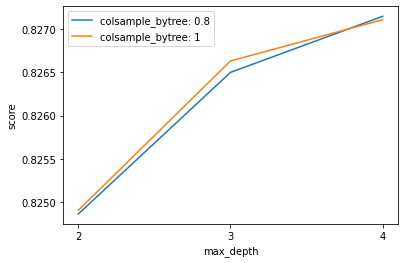

In [125]:
for colsample_bytree, max_depth_score in colsample_bytree_max_depth_dict.items():
  max_depth = list(colsample_bytree_max_depth_dict[colsample_bytree].keys())
  scores = list(colsample_bytree_max_depth_dict[colsample_bytree].values())
  plt.plot(max_depth, scores)

plt.legend(["colsample_bytree: 0.8", "colsample_bytree: 1"])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.xticks(max_depth)
plt.show()

<div>

  #### Relation of n_estimator and colsample_bytree:

</div>

In [126]:
colsample_bytree_n_estimator_dict = {0.8: {100:0, 200:0, 300:0}, 1: {100:0, 200:0, 300:0}}
fixed_params = {"learning_rate": 0.05, "max_depth": 4}

for index, params in enumerate(models_params):
  if params["learning_rate"] == fixed_params["learning_rate"] and params["max_depth"] == fixed_params["max_depth"]:
    colsample_bytree, n_estimators = params["colsample_bytree"], params["n_estimators"]
    colsample_bytree_n_estimator_dict[colsample_bytree][n_estimators] = models_mean_test_score[index]

In [127]:
colsample_bytree_n_estimator_dict

{0.8: {100: 0.8257826257262172,
  200: 0.8271463827642974,
  300: 0.8270386615443228},
 1: {100: 0.8257500216641409,
  200: 0.8271077519350104,
  300: 0.8268975768809712}}

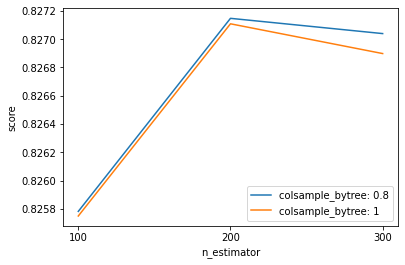

In [128]:
for colsample_bytree, n_estimator_score in colsample_bytree_n_estimator_dict.items():
  n_estimator = list(colsample_bytree_n_estimator_dict[colsample_bytree].keys())
  scores = list(colsample_bytree_n_estimator_dict[colsample_bytree].values())
  plt.plot(n_estimator, scores)

plt.legend(["colsample_bytree: 0.8", "colsample_bytree: 1"])
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.xticks(n_estimator)
plt.show()